In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns

#setups
%matplotlib inline
sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
# read data in
columns_to_keep = ['TUCASEID','TEAGE','TELFS','TESEX','TESPEMPNOT','TRCHILDNUM','TRDPFTPT','TRERNWA','TUYEAR','TUDIARYDAY', 'TEHRUSLT']
summ_demo_iter = pd.read_csv('atussum_0321.csv', iterator= True, chunksize=10000, usecols=columns_to_keep)
summ_list = []
for summ_temp in summ_demo_iter:
    summ_temp = summ_temp.rename(columns={'TUCASEID':'case_id',
                                          'TEAGE':'age',
                                          'TELFS':'employed',
                                          'TESEX':'gender',
                                          'TESPEMPNOT':'spouse_empl',
                                          'TRCHILDNUM':'num_child',
                                          'TRDPFTPT':'full_part_wrk',
                                          'TRERNWA':'weekly_earn',
                                          'TUYEAR':'year', 
                                          'TUDIARYDAY': 'day',
                                          'TEHRUSLT': 'weekly_work_hrs'})
    summ_list.append(summ_temp)
atus = pd.concat(summ_list)
gender_dict = {'1':'Male','2':'Female'}
spouse_dict = {'-1': 'No Spouse', '1':'Employed', '2':'Not employed'}
part_full_dict = {'1':'Full Time', '2':'Part Time'}
atus.shape

(228455, 11)

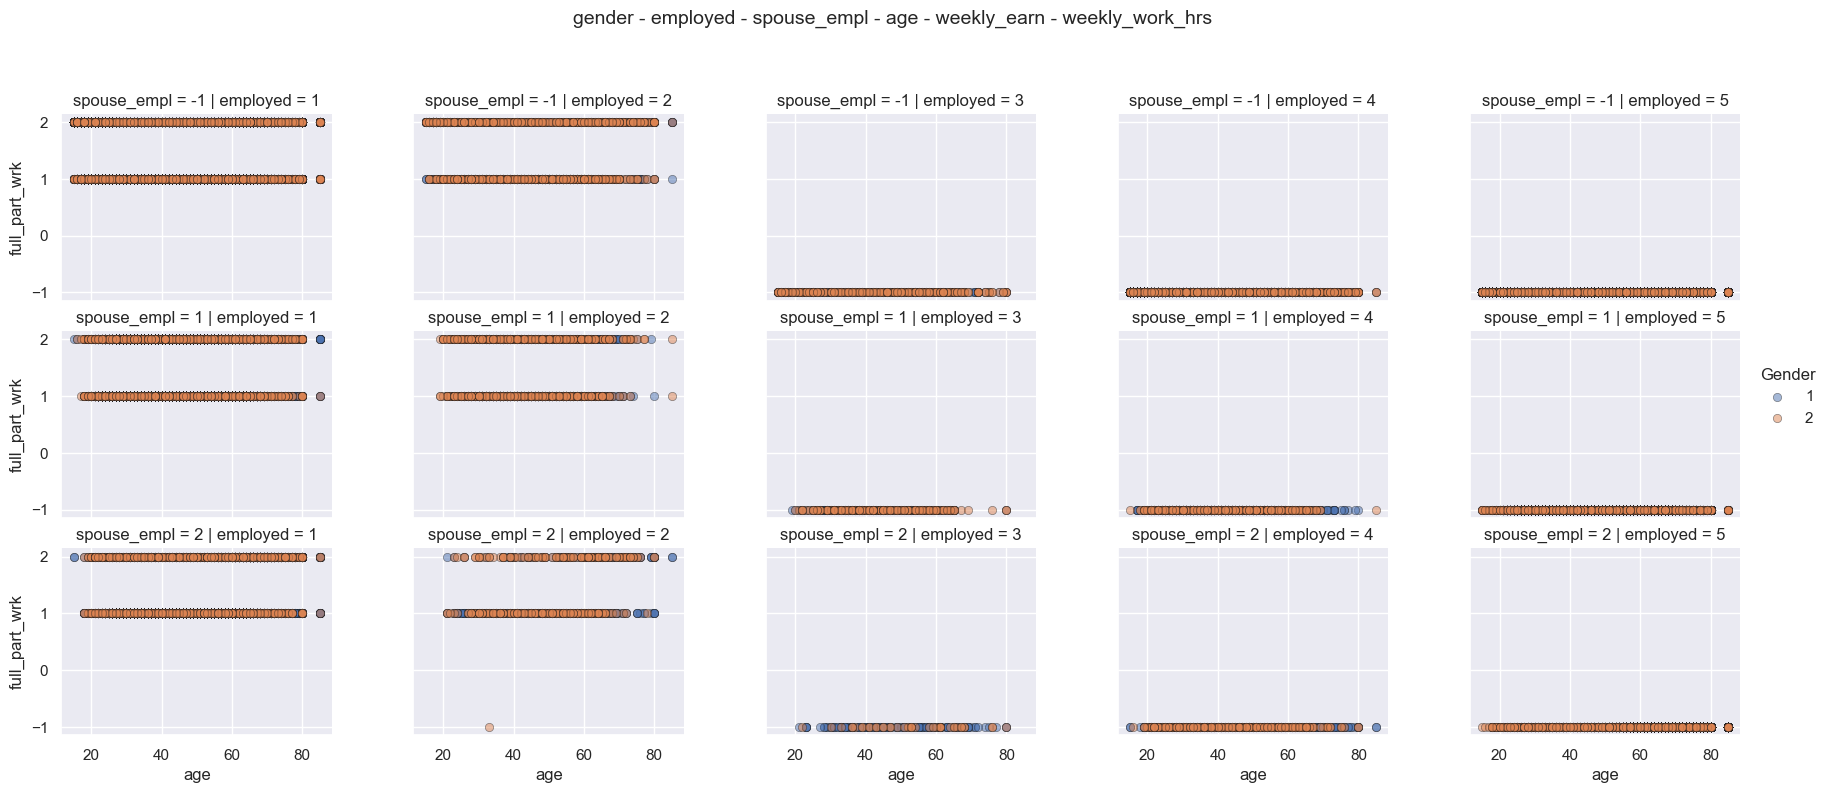

In [4]:
# 5d
## convert to categorical vars. We could also bin the continuous variables and essentially bin them into categorical ones
atus['case_id'] = atus['case_id'].astype('category')
atus['employed'] = atus['employed'].astype('category')
atus['gender'] = atus['gender'].astype('category')
atus['spouse_empl'] = atus['spouse_empl'].astype('category')
atus['day'] = atus['day'].astype('category')
atus['year'] = atus['year'].astype('category')
atus['full_part_wrk'] = atus['full_part_wrk'].astype('category')
atus.dtypes

g = sns.FacetGrid(atus, row='spouse_empl', col="employed", hue='gender')
g.map(plt.scatter,  "age", 'full_part_wrk', alpha=0.5, 
      edgecolor='k', linewidth=0.5)
fig = g.fig 
fig.set_size_inches(18, 8)
fig.subplots_adjust(top=0.85, wspace=0.3)
fig.suptitle('gender - employed - spouse_empl - age - weekly_earn - weekly_work_hrs', fontsize=14)
l = g.add_legend(title='Gender')

ValueError: s must be a scalar, or float array-like with the same size as x and y

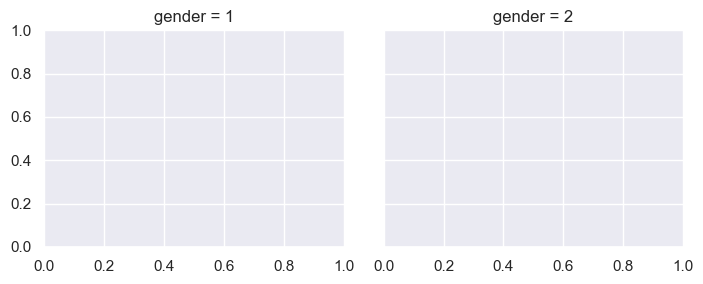

In [45]:
# to visualize data in five dimensions, we leverage various plotting components. 
# Let’s use depth, hue and size to represent three of the data dimensions besides regular axes 
# representing the other two dimensions. Since we use the notion of size, we will be basically plotting a 
# three dimensional bubble chart.
atus_small = atus.head(10000)
weekly = atus_small.loc[:,['weekly_earn']]
age = atus_small.loc[:,['age']]
spl = atus_small.loc[:,['spouse_empl']]
age.shape
g = sns.FacetGrid(atus_small, col="gender", hue="employed", 
                  aspect=1.2, palette=sns.light_palette('black', 4)[1:])
g.map(plt.scatter, "age", "spouse_empl", alpha=0.8, 
      edgecolor='white', linewidth=0.5, s= weekly)
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('gender - employed - age - spouse_empl - weekly_earn', fontsize=14)
l = g.add_legend(title='employed_status')